In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:/Users/Rakshitha/Downloads/Larger_Package_Delivery_Route_Optimization.csv")

In [2]:
label_encoders = {}
categorical_columns = ["Origin", "Destination", "Priority"]
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [3]:
df["TimeWindow_Start"] = df["TimeWindow_Start"].apply(lambda x: int(x[:2]) + int(x[3:]) / 60)
df["TimeWindow_End"] = df["TimeWindow_End"].apply(lambda x: int(x[:2]) + int(x[3:]) / 60)

In [4]:
features = ["Distance_km", "TimeWindow_Start"]
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
k = 4 
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

C:\Users\Rakshitha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Rakshitha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


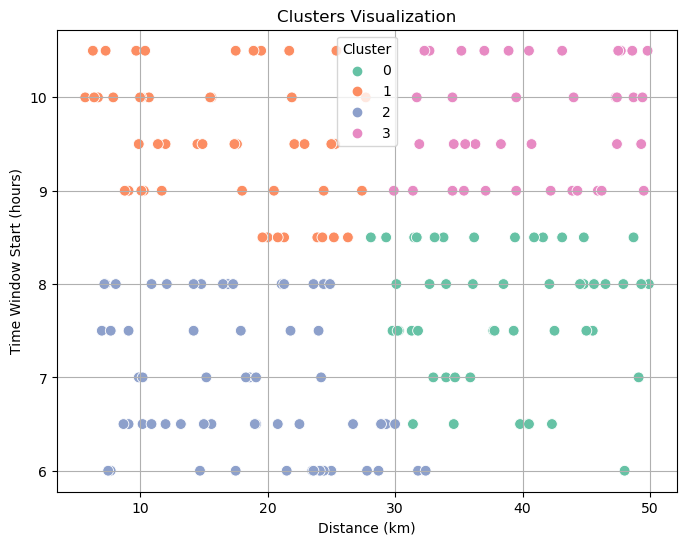

In [6]:
df["Cluster"] = clusters
# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="Distance_km", 
    y="TimeWindow_Start", 
    hue="Cluster", 
    data=df, 
    palette="Set2", 
    s=60
)
plt.title("Clusters Visualization")
plt.xlabel("Distance (km)")
plt.ylabel("Time Window Start (hours)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()
